## Importing necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape
print('\033[1mObservation\033[0m We have 891 samples in our train data which is almost 70% of the total')

Observation We have 891 samples in our train data which is almost 70% of the total


In [4]:
test.shape

(418, 11)

## Data Analysis

### Check for data imbalance

In [5]:
def countplot(x1,df,title):
    sns.set_style("dark")
    sns.countplot(x=x1, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title(title,fontsize = 20)
    plt.show() 

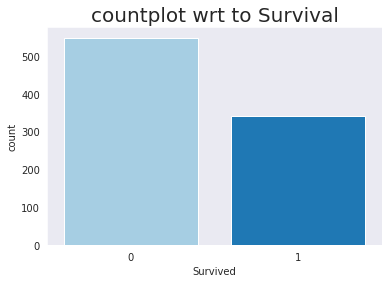

Count plot  - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable
 Observation: When there is a considerable, or in some circumstances extreme, discrepancy between the number of samples of each class of problem, a dataset is said to be imbalanced. As it is not the same case here, our data is balanced data


In [6]:
# Checking for data imbalance
countplot('Survived',train,'countplot wrt to Survival')
print('\033[1mCount plot \033[0m - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable')
print('\033[1m Observation: \033[0mWhen there is a considerable, or in some circumstances extreme, discrepancy between the number of samples of each class of problem, a dataset is said to be imbalanced. As it is not the same case here, our data is balanced data')

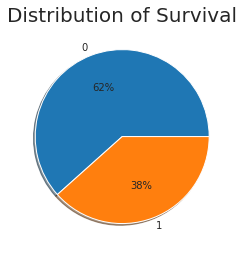

 Pie chart -  Pie charts make sense to show a parts-to-whole relationship for categorical or nominal data
 Observation: As we can see from the pie chart, most of the customers are of the age group 30-45


In [7]:
def pie(df):
    plt.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index.tolist(), autopct='%1.0f%%',shadow = True)
    plt.title('Distribution of Survival', fontsize = 20)
    plt.show()
pie(train)
print('\033[1m Pie chart - \033[0m Pie charts make sense to show a parts-to-whole relationship for categorical or nominal data')
print('\033[1m Observation: \033[0mAs we can see from the pie chart, most of the customers are of the age group 30-45')

In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Check for missing values

**Checking for missing values wrt train data**

In [9]:
pip install missingpy

Note: you may need to restart the kernel to use updated packages.


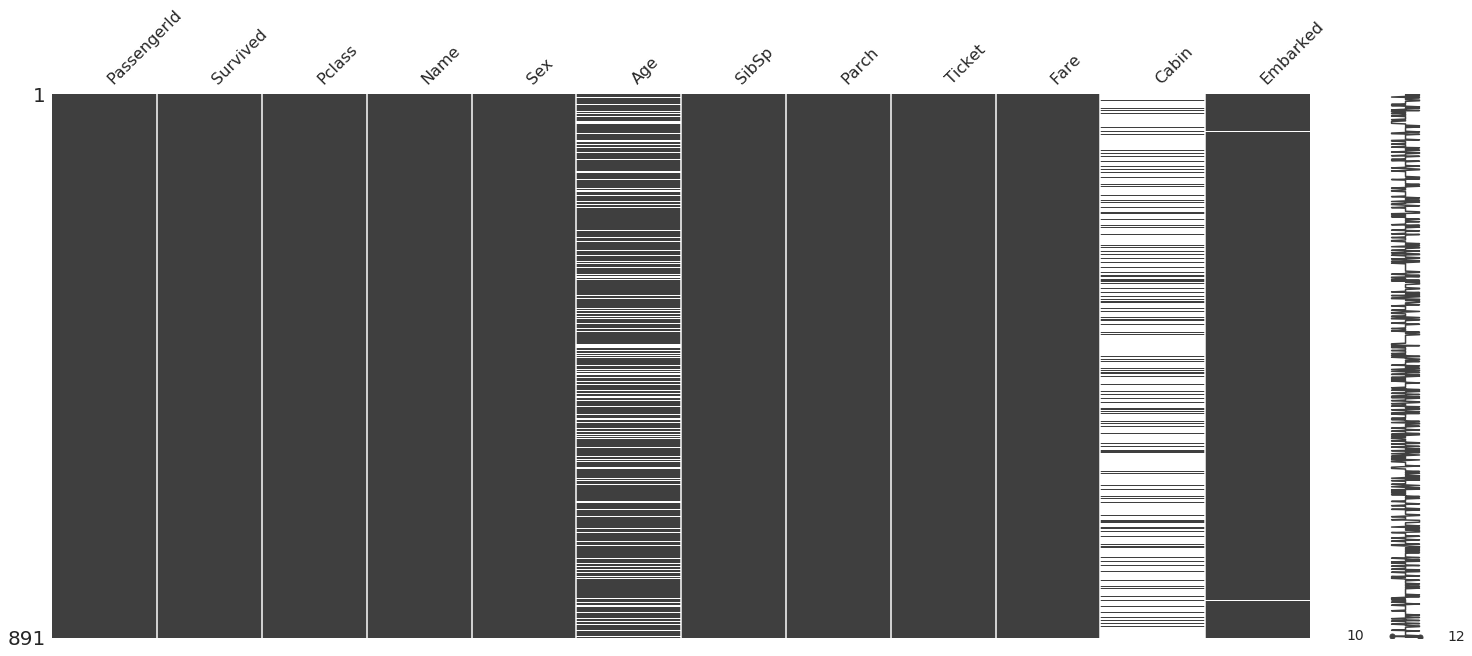

 Observation: We can see some missing values in the age,cabin and embarked columns.The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps


In [10]:
def missing(df):
    msno.matrix(df)
    plt.show()
missing(train)
print("\033[1m Observation: \033[0mWe can see some missing values in the age,cabin and embarked columns.The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps")

In [11]:
print(train.isna().mean().round(4) * 100)
print('\033[1mObservation1: \033[0mThe Age feature is missing approximately 19.8% of its values. But as age seems to be an important factor we will try to impute null values with some appropriate values during our data preprocessing')
print('\033[1mObservation2: \033[0mThe Cabin feature is missing approximately 77.10% of its values. Which is alot, so we might consider dropping it')
print('\033[1mObservation3: \033[0mThe EMbark feature is missing approximately 0.22% of its values, which is quite small and can be taken care off')

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64
Observation1: The Age feature is missing approximately 19.8% of its values. But as age seems to be an important factor we will try to impute null values with some appropriate values during our data preprocessing
Observation2: The Cabin feature is missing approximately 77.10% of its values. Which is alot, so we might consider dropping it
Observation3: The EMbark feature is missing approximately 0.22% of its values, which is quite small and can be taken care off


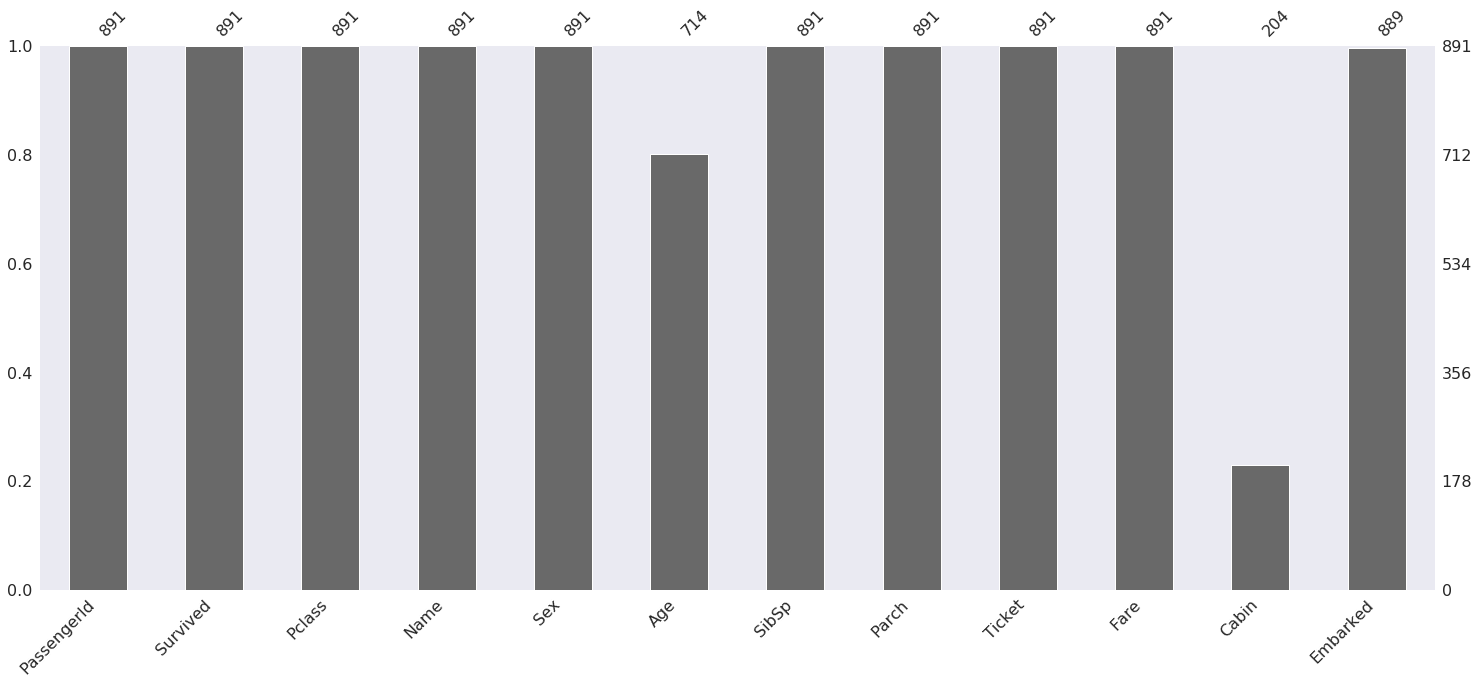

 Missingno_bar: msno.bar is a simple visualization of nullity by column
 Observation1: Age column has upto 80% of data(714 data points)
 Observation2: Cabin column has upto 20% of data(204 data points)
 Observation3: Embarked column has upto 99% of data(889 data points)


In [12]:
def miss_bar(df):
    msno.bar(df)
    plt.show()
miss_bar(train)
print('\033[1m Missingno_bar: \033[0mmsno.bar is a simple visualization of nullity by column')
print('\033[1m Observation1: \033[0mAge column has upto 80% of data(714 data points)' )
print('\033[1m Observation2: \033[0mCabin column has upto 20% of data(204 data points)' )
print('\033[1m Observation3: \033[0mEmbarked column has upto 99% of data(889 data points)' )

**Checking for missing values wrt test data**

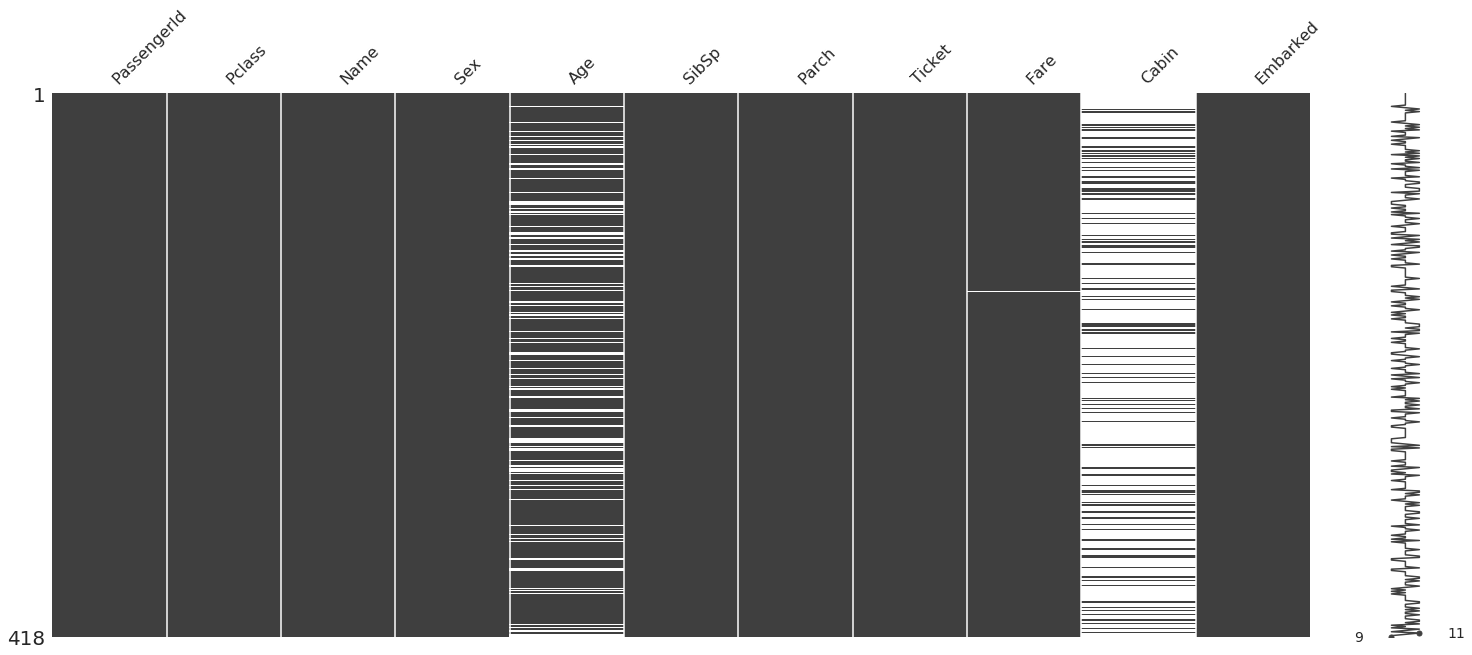

 Observation: We can see some missing values in the age and cabin columns


In [13]:
missing(test)
print('\033[1m Observation: \033[0mWe can see some missing values in the age and cabin columns')

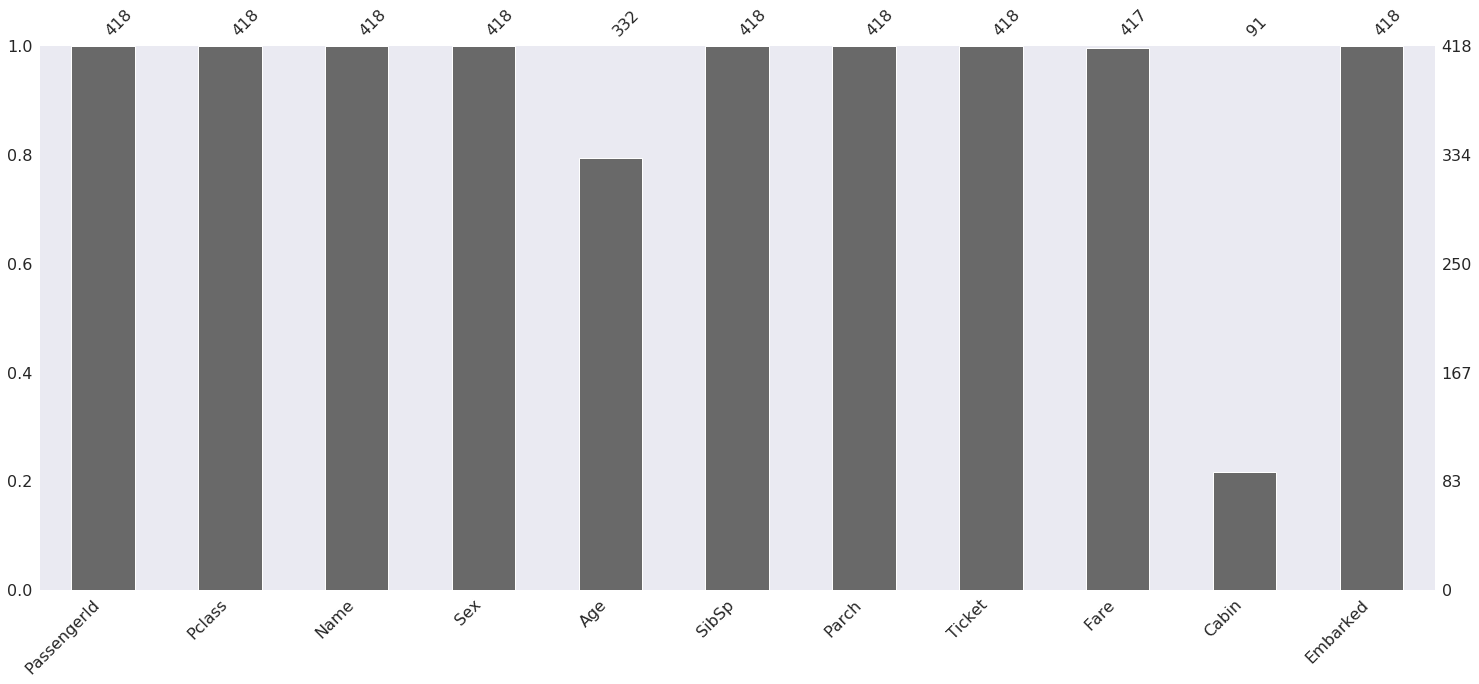

 Observation1: Age column has upto 80% of data(332  data points)
 Observation2: Cabin column has upto 20% of data(91 data points)


In [14]:
miss_bar(test)
print('\033[1m Observation1: \033[0mAge column has upto 80% of data(332  data points)' )
print('\033[1m Observation2: \033[0mCabin column has upto 20% of data(91 data points)' )

## Analysing The Features

**Age column**

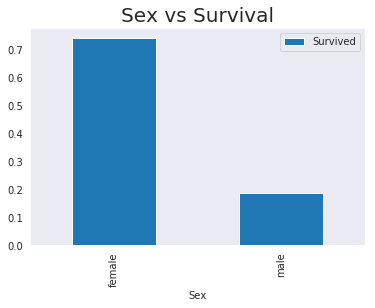

 Observation: We observe that females survival rate is more


In [15]:
def barplot(df,col1,title,col2 = 'Survived'):    
    df[[col1,col2]].groupby([col1]).mean().plot.bar()
    plt.title(title,fontsize = 20)
    plt.show()
barplot(train,'Sex','Sex vs Survival')
print('\033[1m Observation: \033[0mWe observe that females survival rate is more')

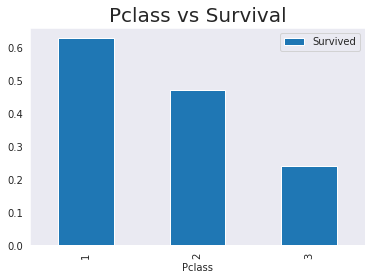

 Observation: We observe that class1 survival rate is more as compared to other classes. Whereas class3 survival is the least


In [16]:
barplot(train,'Pclass','Pclass vs Survival')
print('\033[1m Observation: \033[0mWe observe that class1 survival rate is more as compared to other classes. Whereas class3 survival is the least')

In [17]:
print('\033[1m Observation1: \033[0mAs we can see, 136 out of 216 passengers from pclass = 1 survived, whereas 372 out of 491 passengers from pclass = 3 did not survive')
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

 Observation1: As we can see, 136 out of 216 passengers from pclass = 1 survived, whereas 372 out of 491 passengers from pclass = 3 did not survive


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


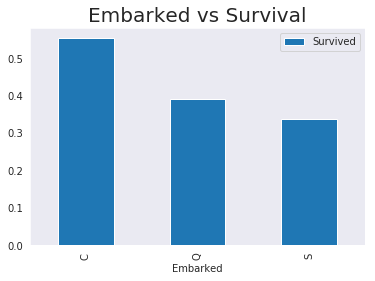

In [18]:
barplot(train,'Embarked','Embarked vs Survival')

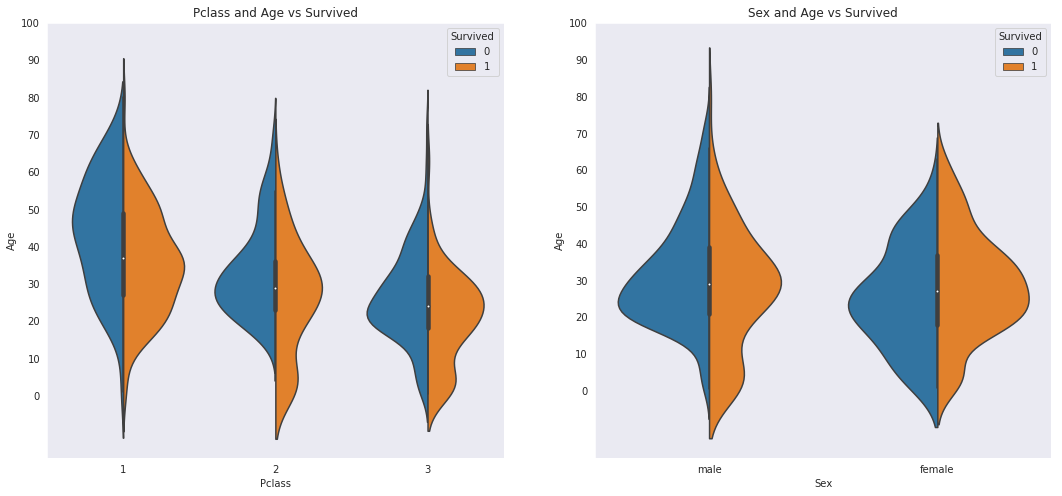

 Observation1: The number of children increased with pclass and their survival rate was pretty good irrespective of what pclass they were in
 Observation2: Survival rate of men decreased with increase in age
 Observation3: Survival rate of women aged between 20-50 is more. Also, irrespective of age or class the survival rate of women was good


In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
print('\033[1m Observation1: \033[0mThe number of children increased with pclass and their survival rate was pretty good irrespective of what pclass they were in')
print('\033[1m Observation2: \033[0mSurvival rate of men decreased with increase in age')
print('\033[1m Observation3: \033[0mSurvival rate of women aged between 20-50 is more. Also, irrespective of age or class the survival rate of women was good')


**Chances for Survival by Port Of Embarkation**

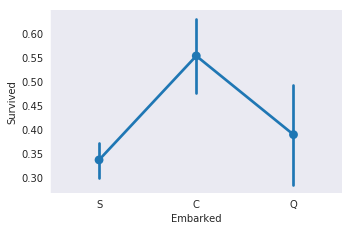

 Observation: sSurvival rate of port c is highest around 55%


In [20]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()
print('\033[1m Observation: \033[0msSurvival rate of port c is highest around 55%')


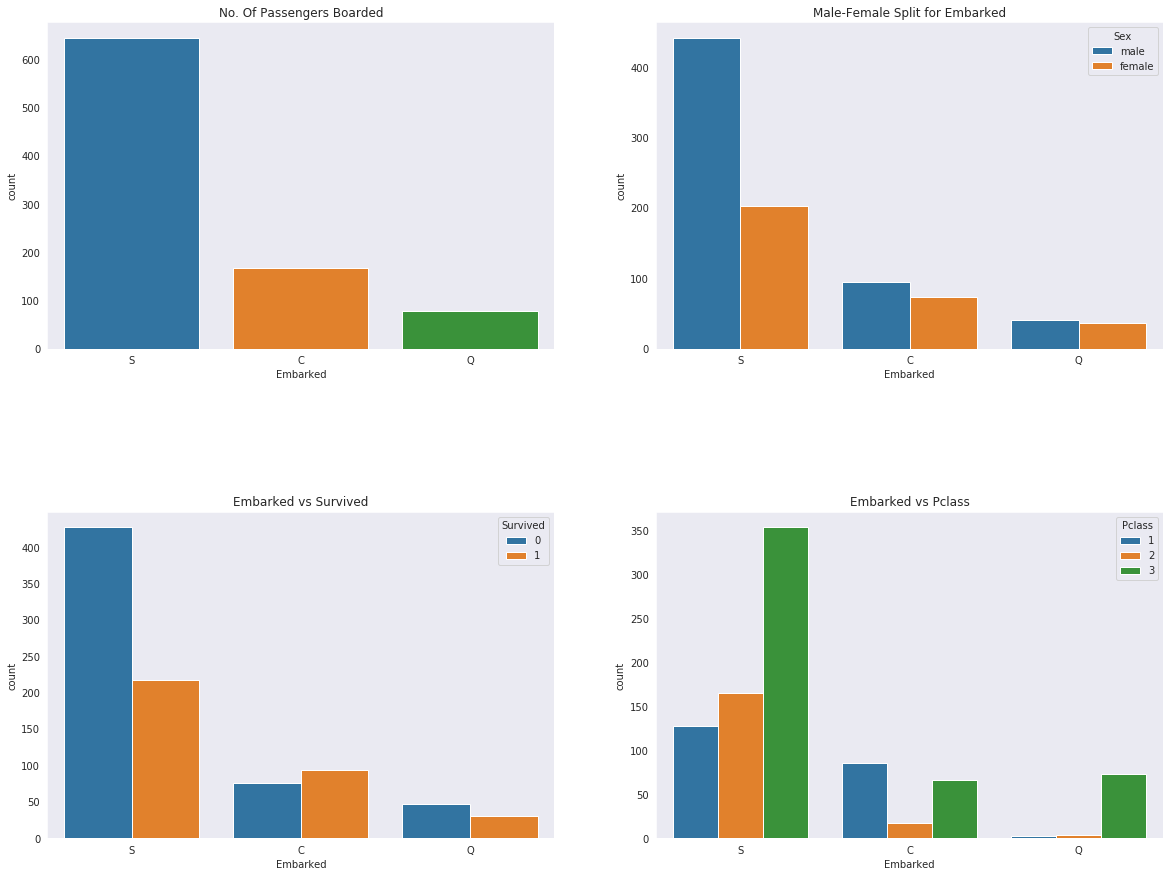

 Observation1: sMore number of people have boarded from port S and least is from port Q
 Observation2: sMore number of male passengers have baorded from port S
 Observation3: sThe chances of survival wrt to port C is more
 Observation4: sMore number of passengers from pclass =3 have boarded from port S and more number of passengers from pclass = 1 have boarded from port S, hence we can assume that couls be a reason why more number of passengers were saved from port S


In [21]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()
print('\033[1m Observation1: \033[0msMore number of people have boarded from port S and least is from port Q')
print('\033[1m Observation2: \033[0msMore number of male passengers have baorded from port S')
print('\033[1m Observation3: \033[0msThe chances of survival wrt to port C is more')
print('\033[1m Observation4: \033[0msMore number of passengers from pclass =3 have boarded from port S and more number of passengers from pclass = 1 have boarded from port S, hence we can assume that couls be a reason why more number of passengers were saved from port S')

In [22]:
print('\033[1m Observation: \033[0msAs you can see, 93 out of 168 people have survived from port C. So sruvival rate wrt port C is more')
pd.crosstab(train.Embarked,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

 Observation: sAs you can see, 93 out of 168 people have survived from port C. So sruvival rate wrt port C is more


Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


**Chances for Survival by Port Of SibSp**

In [23]:
print('\033[1m Observation: \033[0msAs you can see, people with no sibling/spouse survived the most')
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

 Observation: sAs you can see, people with no sibling/spouse survived the most


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


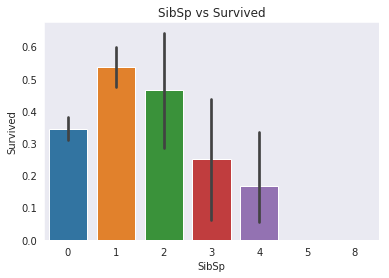

 Observation: sWe observe that, with the increase in number of siblibs/spouse, survival rate decreases


In [24]:
sns.barplot('SibSp','Survived',data=train)
plt.title('SibSp vs Survived')
plt.show()
print('\033[1m Observation: \033[0msWe observe that, with the increase in number of siblibs/spouse, survival rate decreases')

In [25]:
print('\033[1m Observation: \033[0msWe observe that,passengers with siblib/spouse>3 were all from pclass= 3, so their survival rate was less')
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

 Observation: sWe observe that,passengers with siblib/spouse>3 were all from pclass= 3, so their survival rate was less


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Chances for Survival by Port Of Parch**

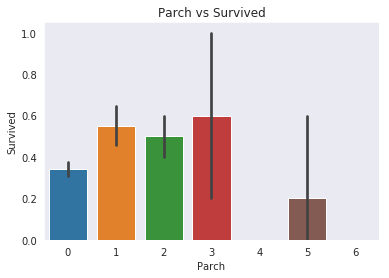

 Observation: sWe observe that, with the increase in number of parents/children, survival rate decreases


In [26]:
sns.barplot('Parch','Survived',data=train)
plt.title('Parch vs Survived')
plt.show()
print('\033[1m Observation: \033[0msWe observe that, with the increase in number of parents/children, survival rate decreases')

In [27]:
print('\033[1m Observation: \033[0msWe observe that,passengers with Parents/children>3 were all from pclass= 3, so their survival rate was less')
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

 Observation: sWe observe that,passengers with Parents/children>3 were all from pclass= 3, so their survival rate was less


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


**Checking for outliers wrt train data**

 Box plots - Box plots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset


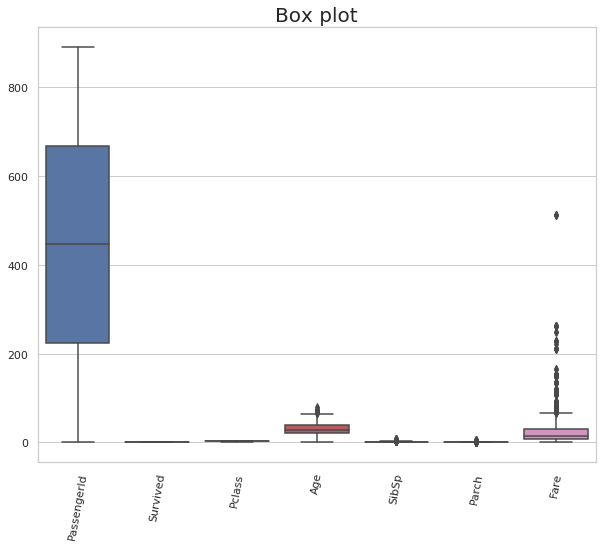

 Observation1: As we can see there are outliers in age and fare columns


In [28]:
print('\033[1m Box plots -\033[0m Box plots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset')
def outliers(df):
    sns.set(style="whitegrid",font_scale=1)
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df)
    plt.xticks(rotation=80)
    plt.title("Box plot",fontsize = 20)
    plt.show()
outliers(train)
print('\033[1m Observation1: \033[0mAs we can see there are outliers in age and fare columns')

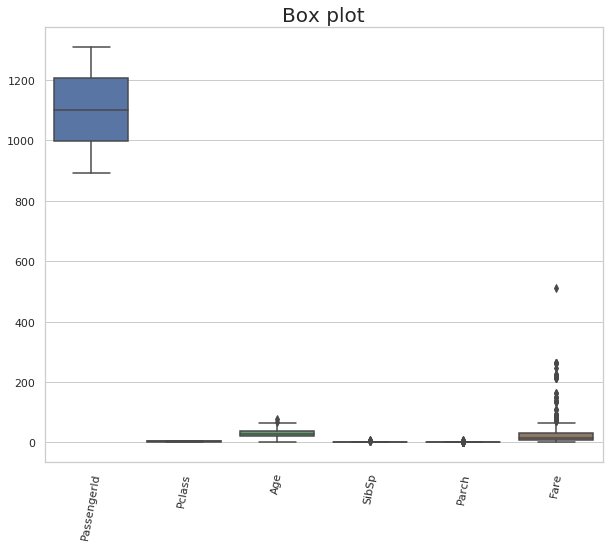

In [29]:
outliers(test)

## Data Cleaning an Feature engineering

**Treating outliers**`

In [30]:
# The code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ and 'Age' variable.
def treating_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

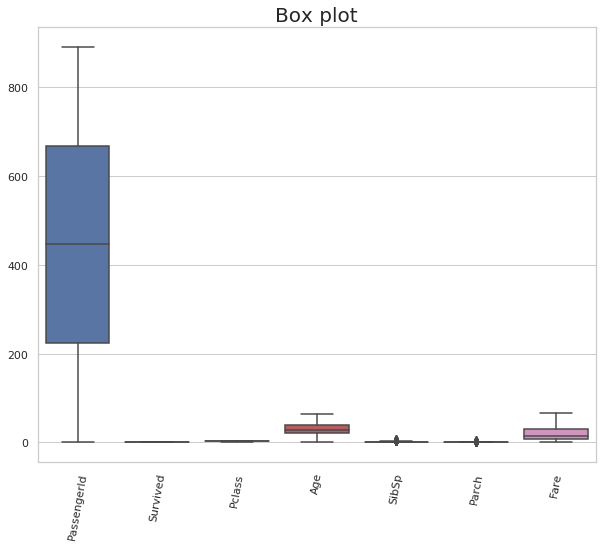

 Observation: As we can see, the train dataset is free of outliers


In [31]:
treating_outliers(train,'Fare')
treating_outliers(train,'Age')
outliers(train)
print('\033[1m Observation: \033[0mAs we can see, the train dataset is free of outliers')

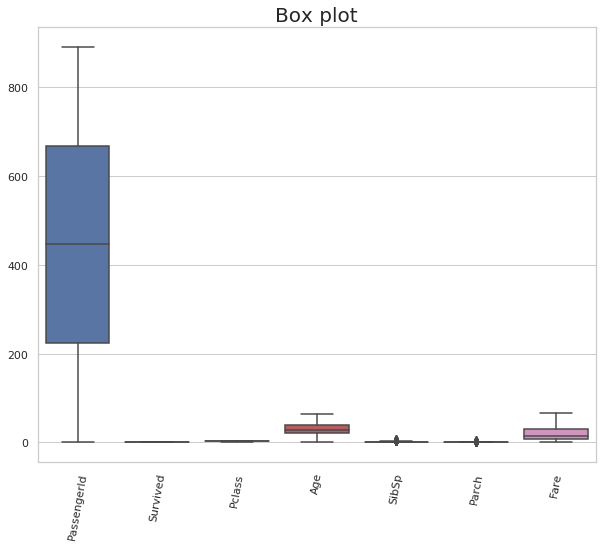

 Observation: As we can see, the test dataset is free of outliers


In [32]:
treating_outliers(test,'Fare')
treating_outliers(test,'Age')
outliers(train)
print('\033[1m Observation: \033[0mAs we can see, the test dataset is free of outliers')

### Adding CabinBool

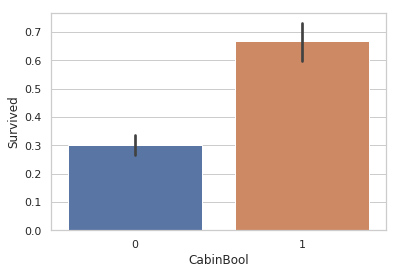

In [33]:
# It's seems that people with recorded cabin values have high socioeconomic class, hence more likely to survive
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

## Dropping unwanted features

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
#we'll start off by dropping the ticket feature since not a lot more useful information can be extracted from it. 
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
# We drop off cabin feature, as we already have cabin bool
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## Imputing missing values with appropriate value

**Embarked**

In [36]:
# As we can see more number of passengers boarded via embark S, we will impute the missing values of Embark with S
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

### Adding ageGroup column

In [38]:
# Separating age into different bins
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

In [39]:
#we'll fill in the Age feature's missing values. It would be nonsensical to fill all of the missing values with the same value because a bigger percentage of them are missing
# Here we are extracting titles from the names from both test as well as train data (full_data)
full_data = [train,test]
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [40]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [41]:
# replace various titles with more common names
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
# Correcting misspelled titles   
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
# Checking for what types of passengers managed to survive
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.6344,C,1,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult,Mr


In [43]:
# Encoding title column:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in full_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.6344,C,1,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult,1


In [44]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student,3


In [46]:
print(pd.crosstab(train['Title'], train['Sex']))

Sex    female  male
Title              
1           0   517
2         185     0
3         126     0
4           0    40
5           1     1
6           2    19


## Encoding categorical features

In [47]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['ageGroup'] = test['AgeGroup'].map(age_mapping)
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

## Dropping unwanted features

In [48]:
# Dropping the Age feature 
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
# Since we already have extracted the titles from Name feature, we can discard that column
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,0,4,1
1,2,1,1,1,1,0,65.6344,2,1,6,3
2,3,1,3,1,0,0,7.9250,1,0,5,2
3,4,1,1,1,1,0,53.1000,1,1,5,3
4,5,0,3,0,0,0,8.0500,1,0,5,1


### Cleaning Fare column and adding a fare band feature

In [50]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,0,4,1,1
1,2,1,1,1,1,0,2,1,6,3,4
2,3,1,3,1,0,0,1,0,5,2,2
3,4,1,1,1,1,0,1,1,5,3,4
4,5,0,3,0,0,0,1,0,5,1,2


In [52]:
# Train data is clean
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
AgeGroup       0
Title          0
FareBand       0
dtype: int64

In [53]:
# Test data is clean
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
AgeGroup       0
Title          0
ageGroup       0
FareBand       0
dtype: int64

### Correlation analysis

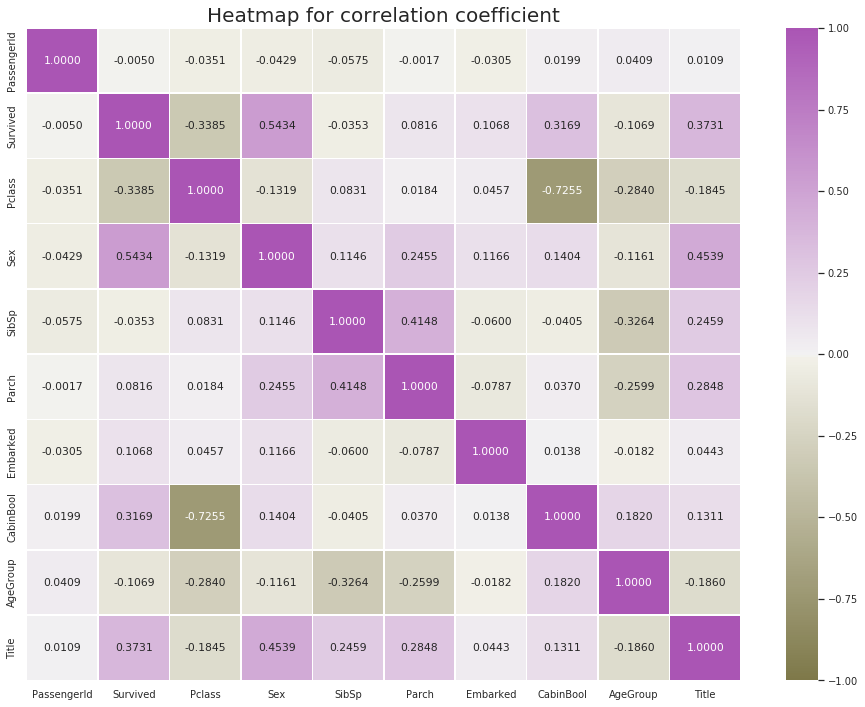

In [55]:
df_corr = train.corr()
# correlation matrix
sns.set(font_scale=0.9)
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(80, 302, s=60, as_cmap=True))
#plt.yticks(rotation=0)
plt.title('Heatmap for correlation coefficient',fontsize = 20)
plt.show()

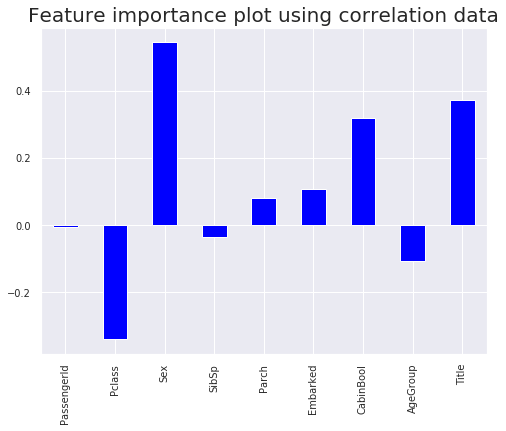

In [57]:
train.drop('Survived', axis=1).corrwith(train.Survived).plot(kind='bar', figsize=(8, 6), color='blue', title="Survived vs all features")
plt.title('Feature importance plot using correlation data',fontsize = 20)
plt.show()